## Observations and Insights 

THESE ARE MY OBSERVATIONS AND INSIGHTS

1 – COMPETITION
We can see that there are approximately the same number of male mice (958), than female mice (925). There are measurements 230 for Capomulin and 151 for Propriva. The mean of the Tumor Volume with Capomulin is 40.67 mm3, while the mean for Propriva is of 52.45 mm3. This tells that the bigger the tumor, the less measurements were made. In fact, what I think is that with time, we can see that Capomulin is a very effective drug against tumor growth, while others are not that much.

2 – STABILITY
Stability is also an important point when there talks about pharmaceutics (pymaceuticals). In the box plot diagram, the final tumor volume treated by Capomulin drug is lesser than with Ramicane and Infubinol. We can see also that Capomulin is a stable drug because even if there are a couple of outliers, the box of plot is less dispersed in terms of central values, which are in the interquartile central plot. Ceftamin is also a central value stable drug, but even if it shows only outlier, is more disperse in terms of central tendency.

3 – EFFECTIVENESS
 In the individual mouse study, I can see that there is a relation that shows that the drug works, because as time passes, the tumor becomes of lesser size. In Timepoint 0 the Tumor Volume (mm3) is of about 44 mm3, while at Timepoint 40 the Tumor Volume is of about 32mm3. This shows that the drug Capomulin indeed works, as it reduces the size of the tumor over time.


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_mouse = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice.
number_mice = len(data_mouse["Mouse ID"].unique())
print(f"The number of mice is {number_mice}")

The number of mice is 249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data_mouse[data_mouse.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [103]:
duplicate_mouse["Mouse ID"].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [104]:
print(f"The duplicate mouse is g889")

The duplicate mouse is g889


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = data_mouse.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [98]:
# Checking the number of mice in the clean DataFrame.
print(f"There are {len(clean_mouse)} in the clean DataFrame")

There are 1883 in the clean DataFrame


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

separate_regimen = clean_mouse.groupby("Drug Regimen")
mean_regimen = separate_regimen.mean()["Tumor Volume (mm3)"]
median_regimen = separate_regimen.median()["Tumor Volume (mm3)"]
variance_regimen = separate_regimen.var()["Tumor Volume (mm3)"]
std_regimen = separate_regimen.std()["Tumor Volume (mm3)"]
sem_regimen = separate_regimen.sem()["Tumor Volume (mm3)"]

In [11]:
data = {"Mean":mean_regimen,
       "Median":median_regimen,
       "Variance":median_regimen,
       "Standard Deviation":std_regimen,
       "SEM":sem_regimen}

statistics_summary_df = pd.DataFrame(data)
statistics_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,52.288934,7.821003,0.581331
Propriva,52.458254,50.854632,50.854632,6.637293,0.540135
Ramicane,40.216745,40.673236,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,52.431737,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = clean_mouse.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements_drug_regimen_pandas = clean_mouse["Drug Regimen"].value_counts()
measurements_drug_regimen_pandas

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64

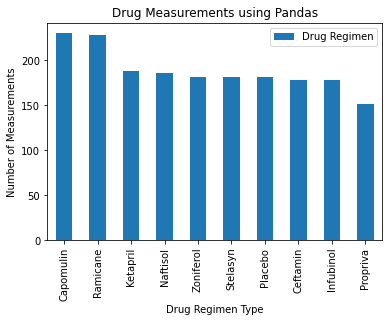

<Figure size 432x288 with 0 Axes>

In [115]:
measurements_drug_regimen_pandas.plot(kind='bar')
plt.xlabel("Drug Regimen Type")
plt.ylabel("Number of Measurements")
plt.title("Drug Measurements using Pandas")
plt.legend()
plt.show()
plt.tight_layout()

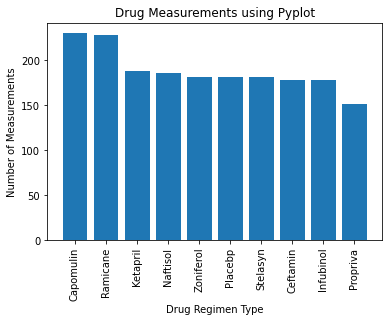

In [123]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements_drug_regimen_pyplot = clean_mouse["Drug Regimen"].value_counts()

x_axis = np.arange(len(measurements_drug_regimen_pyplot))

plt.bar(x_axis,measurements_drug_regimen_pyplot)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations,["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebp",
                          "Stelasyn","Ceftamin","Infubinol","Propriva"], rotation="vertical")

plt.title("Drug Measurements using Pyplot")
plt.xlabel("Drug Regimen Type")
plt.ylabel("Number of Measurements")

plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mouse = clean_mouse["Sex"].value_counts()
gender_mouse

Male      958
Female    925
Name: Sex, dtype: int64

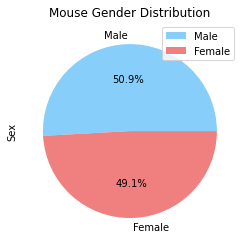

In [127]:
colors = ["lightskyblue","lightcoral"]
gender_mouse.plot(kind="pie",colors=colors,autopct="%1.1f%%")
plt.title("Mouse Gender Distribution")
plt.legend(loc="best")

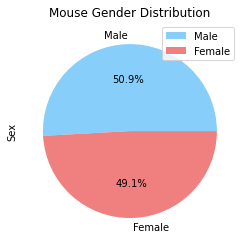

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_lab = ["Male","Female"]
colors = ["lightskyblue","lightcoral"]

plt.pie(gender_mouse, labels=gender_lab, colors=colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Mouse Gender Distribution")
plt.legend()

## Quartiles, Outliers and Boxplots

In [23]:
clean_data_df = clean_mouse.copy()

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

clean_data_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin") |
                                            (clean_data_df["Drug Regimen"] == "Ramicane") |
                                            (clean_data_df["Drug Regimen"] == "Infubinol") |
                                            (clean_data_df["Drug Regimen"] == "Ceftamin")]

clean_data_df

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [109]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = clean_data_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The quartiles are as follows ")
print(quartiles)

print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f"The IQR is {iqr}")

# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol_data = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("Outliers must be below the lower bound and above the upper bound")
print(f"There are outliers below the lower bound which is {lower_bound}")
print(f"There are outliers above the upper bound which is {upper_bound}")

The quartiles are as follows 
0.25    40.220171
0.50    45.000000
0.75    50.356471
Name: Tumor Volume (mm3), dtype: float64
The lower quartile is 40.2201707875
The upper quartile is 50.356470630000004
The IQR is 10.136299842500001
Outliers must be below the lower bound and above the upper bound
There are outliers below the lower bound which is 25.01572102375
There are outliers above the upper bound which is 65.56092039375001


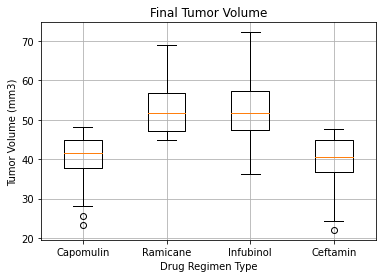

In [160]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_xlabel("Drug Regimen Type")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.grid()
ax1.boxplot(tumor_vol_data, labels = drug_treatments )

plt.show()

## Line and Scatter Plots

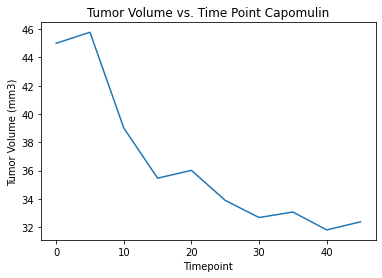

In [161]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

r554 = clean_mouse[clean_mouse["Mouse ID"].isin(["r554"])]
plt.plot(r554["Timepoint"], r554["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point Capomulin")
plt.show()

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin")]

capomulin_average = capomulin_regimen.groupby(["Mouse ID"]).mean()

In [77]:
capomulin_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [79]:
capomulin_weight_average = capomulin_average["Weight (g)"]
capomulin_tumor_average = capomulin_average["Tumor Volume (mm3)"]

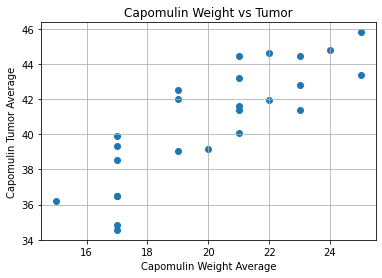

In [148]:
plt.scatter(capomulin_weight_average, capomulin_tumor_average)
plt.xlabel("Capomulin Weight Average")
plt.ylabel("Capomulin Tumor Average")
plt.title("Capomulin Weight vs Tumor")
plt.grid()
plt.show()

## Correlation and Regression

In [110]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation Coefficient

correlation_coefficient = st.pearsonr(capomulin_weight_average,capomulin_tumor_average)
print(f"The correlation coefficient is {correlation_coefficient}")

The correlation coefficient is (0.8419363424694717, 1.322572243471279e-07)


The line equation is y = 0.95x +21.55


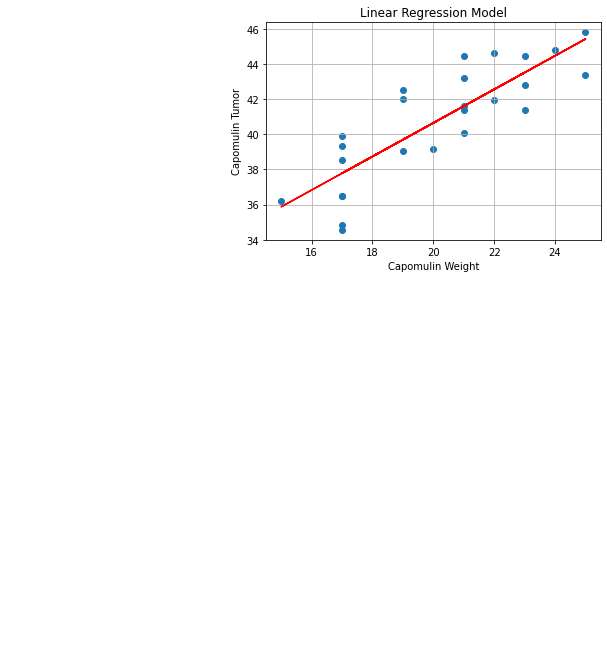

In [152]:
# Linear Regression Model

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight_average,capomulin_tumor_average)
regress_values = capomulin_weight_average * slope + intercept

plt.grid()

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The line equation is {line_eq}")
plt.scatter(capomulin_weight_average, capomulin_tumor_average)
plt.title("Linear Regression Model")
plt.xlabel("Capomulin Weight")
plt.ylabel("Capomulin Tumor")
plt.plot(capomulin_weight_average, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()